In [1]:
from keras.models import model_from_json
import numpy as np
import scipy.misc
from tensorflow.keras.models import model_from_json
from tensorflow.keras.optimizers import SGD
from PIL import Image

In [6]:
#json_model = open("./model.json", "r")
#model = model_from_json(json_model.read())

## 모델 구조 불러오기

In [2]:
# open, close 한번에 진행
with open("./CIFAR_model/model.json","r") as f:
    model = model_from_json(f.read())

In [3]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

## 모델 load weights

In [4]:
model.load_weights('./CIFAR_model/model.h5')

In [27]:
label = {0 : "airplane",
        1 : "automobile",
        2 : "bird",
        3 : "cat",
        4 : "deer",
        5 : "dog",
        6 : "frog",
        7 : "horse",
        8 : "ship",
        9 : "truck",}

In [22]:
# airplane
image1 = Image.open("./CIFAR_model/airplane.jpg").resize(size=(32, 32)) 
my_image1 = np.array(image1, dtype=float) / 255
my_image1 = my_image1.reshape(-1,32,32,3)

In [23]:
# dog
image2 = Image.open("./CIFAR_model/dog.jpg").resize(size=(32, 32)) 
my_image2 = np.array(image2, dtype=float) / 255
my_image2 = my_image2.reshape(-1,32,32,3)

In [24]:
optim = SGD()
model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

In [28]:
label[np.argmax(model.predict(my_image1))]

'airplane'

In [29]:
label[np.argmax(model.predict(my_image2))]

'dog'

# EC2 서버 연결 후 API 요청 테스트

In [31]:
import base64
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO
import requests

In [32]:
with open('./CIFAR_model/dog.jpg', 'rb') as img:
    base64_string = base64.b64encode(img.read())

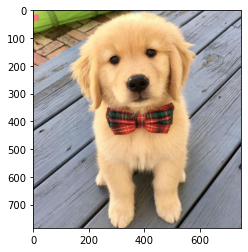

In [33]:
img = Image.open(BytesIO(base64.b64decode(base64_string)))
plt.imshow(img)

In [34]:
url  = "http://54.180.108.185:8000/predict/"

In [35]:
data = {'image' : base64_string}

In [36]:
r = requests.post(url, data = data)

In [37]:
r.text

'{"breed":"golden_retriever"}'

In [38]:
if r.json()['breed']  == "golden_retriever":
    print ("당신의 강아지는 골든 리트리버입니다.")

당신의 강아지는 골든 리트리버입니다.
